In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.linear_model import LassoCV, LogisticRegressionCV
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

import csv
from pprint import pprint
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

In [ ]:
# Load data
df = pd.concat([pd.read_csv('/content/drive/MyDrive/ML1 final project group 9/Data/train.csv'), pd.read_csv('/content/drive/MyDrive/ML1 final project group 9/Data/test.csv')])
df = df.iloc[:, 1:]
df = df.reset_index(drop=True)
df

AGE  Adenocarcinoma  Large cell carcinoma  Squamous cell carcinoma  TX  \
0       72               1                     1                        0   1   
1       66               1                     0                        0   0   
2       75               1                     1                        0   1   
3       77               1                     0                        1   0   
4       85               1                     0                        0   0   
...    ...             ...                   ...                      ...  ..   
14995   47               1                     1                        0   0   
14996   44               1                     0                        1   0   
14997   80               0                     0                        1   0   
14998   69               1                     0                        0   0   
14999   81               0                     1                        0   0   

       T0  T1  T1a  T1b  T1c  ...  Height  Weight  FEV1_FVC_P  DLCO_VA_P  \
0       0   0    0    1    0  ...   142.0    68.2          87        102   
1       0   1    0    0    0  ...   179.4    61.1          54        112   
2       0   0    0    0    0  ...   169.8    73.8          79         73   
3       0   1    0    1    0  ...   158.5    79.1          78        137   
4       0   0    0    0    1  ...   172.3    44.3          48         85   
...    ..  ..  ...  ...  ...  ...     ...     ...         ...        ...   
14995   0   0    0    0    1  ...   147.6    79.0          40         79   
14996   0   1    1    1    1  ...   151.0    41.6          69         67   
14997   0   0    1    0    0  ...   157.8    58.2          40        137   
14998   0   0    0    0    0  ...   167.5    56.7          89         77   
14999   0   1    0    1    0  ...   155.7    41.0          94         66   

       EGFR mutation Detection  Operation  Chemotherapy  Radiation Therapy  \
0                           99          1             0                  0   
1                           99          0             1                  0   
2                           99          0             1                  0   
3                            1          0             0                  0   
4                           99          1             0                  1   
...                        ...        ...           ...                ...   
14995                       99          1             0                  0   
14996                       99          0             0                  0   
14997                        0          1             1                  0   
14998                        0          1             1                  1   
14999                        0          0             1                  0   

       Death  Survival period  
0          0              157  
1          0              567  
2          0              253  
3          0              266  
4          0              470  
...      ...              ...  
14995      0              104  
14996      0               42  
14997      0              190  
14998      0              635  
14999      0              635  

[15000 rows x 33 columns]

Adenocarcinoma(선암), Squamous cell carcinoma(편평상피세소암), Large cell carcinoma(대세포암) are non-small cell lung cancer

If not, they are small-cell lung cancer

T : Primary Tumor
N : Lymph Nodes
M : Metastasis

In [ ]:
len(df.columns)

33

In [ ]:
df.columns

Index(['AGE', 'Adenocarcinoma', 'Large cell carcinoma',
       'Squamous cell carcinoma', 'TX', 'T0', 'T1', 'T1a', 'T1b', 'T1c', 'T2',
       'T2a', 'T2b', 'T3', 'T4', 'N1', 'N2', 'N3', 'M1a', 'M1b', 'M1c',
       'Type of Drink', 'Smoke', 'Height', 'Weight', 'FEV1_FVC_P', 'DLCO_VA_P',
       'EGFR mutation Detection', 'Operation', 'Chemotherapy',
       'Radiation Therapy', 'Death', 'Survival period'],
      dtype='object')

In [ ]:
df_features = pd.concat([df.loc[:, 'AGE'], df.loc[:, 'Type of Drink':'Death']], axis=1)
df_features

AGE  Type of Drink  Smoke  Height  Weight  FEV1_FVC_P  DLCO_VA_P  \
0       72             99      2   142.0    68.2          87        102   
1       66             99      2   179.4    61.1          54        112   
2       75              3      2   169.8    73.8          79         73   
3       77              2      2   158.5    79.1          78        137   
4       85              2      2   172.3    44.3          48         85   
...    ...            ...    ...     ...     ...         ...        ...   
14995   47             99      0   147.6    79.0          40         79   
14996   44             99      2   151.0    41.6          69         67   
14997   80              3      0   157.8    58.2          40        137   
14998   69              2      2   167.5    56.7          89         77   
14999   81              3      1   155.7    41.0          94         66   

       EGFR mutation Detection  Operation  Chemotherapy  Radiation Therapy  \
0                           99          1             0                  0   
1                           99          0             1                  0   
2                           99          0             1                  0   
3                            1          0             0                  0   
4                           99          1             0                  1   
...                        ...        ...           ...                ...   
14995                       99          1             0                  0   
14996                       99          0             0                  0   
14997                        0          1             1                  0   
14998                        0          1             1                  1   
14999                        0          0             1                  0   

       Death  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
14995      0  
14996      0  
14997      0  
14998      0  
14999      0  

[15000 rows x 12 columns]

In [ ]:
df_features['BMI'] = df_features['Weight'] / (df_features['Height']/100)**2
df_bmi = pd.concat([df_features.loc[:, 'AGE':'Smoke'], df_features.loc[:, 'FEV1_FVC_P':]], axis=1)
df_bmi

AGE  Type of Drink  Smoke  FEV1_FVC_P  DLCO_VA_P  \
0       72             99      2          87        102   
1       66             99      2          54        112   
2       75              3      2          79         73   
3       77              2      2          78        137   
4       85              2      2          48         85   
...    ...            ...    ...         ...        ...   
14995   47             99      0          40         79   
14996   44             99      2          69         67   
14997   80              3      0          40        137   
14998   69              2      2          89         77   
14999   81              3      1          94         66   

       EGFR mutation Detection  Operation  Chemotherapy  Radiation Therapy  \
0                           99          1             0                  0   
1                           99          0             1                  0   
2                           99          0             1                  0   
3                            1          0             0                  0   
4                           99          1             0                  1   
...                        ...        ...           ...                ...   
14995                       99          1             0                  0   
14996                       99          0             0                  0   
14997                        0          1             1                  0   
14998                        0          1             1                  1   
14999                        0          0             1                  0   

       Death        BMI  
0          0  33.822654  
1          0  18.984376  
2          0  25.596524  
3          0  31.486033  
4          0  14.922211  
...      ...        ...  
14995      0  36.262219  
14996      0  18.244814  
14997      0  23.372705  
14998      0  20.209401  
14999      0  16.912454  

[15000 rows x 11 columns]

In [ ]:
df_non_small = df.loc[:, 'Adenocarcinoma':'Squamous cell carcinoma']
df_cancer_T = df.loc[:, 'TX':'T4']
df_cancer_N = df.loc[:, 'N1':'N3']
df_cancer_M = df.loc[:, 'M1a':'M1c']

In [ ]:
#### plt setting
plt.rcParams['figure.figsize'] = [15,5]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'sans-serif'

----
# Prediction: Do the patients have Lung Cancer?

In [ ]:
df1 = pd.concat([df_non_small, df_cancer_T.loc[:, 'T1':]], axis=1).sum(axis=1)
df1 = df1.apply(lambda x: 1 if x>0 else 0)
df1

0        1
1        1
2        1
3        1
4        1
        ..
14995    1
14996    1
14997    1
14998    1
14999    1
Length: 15000, dtype: int64

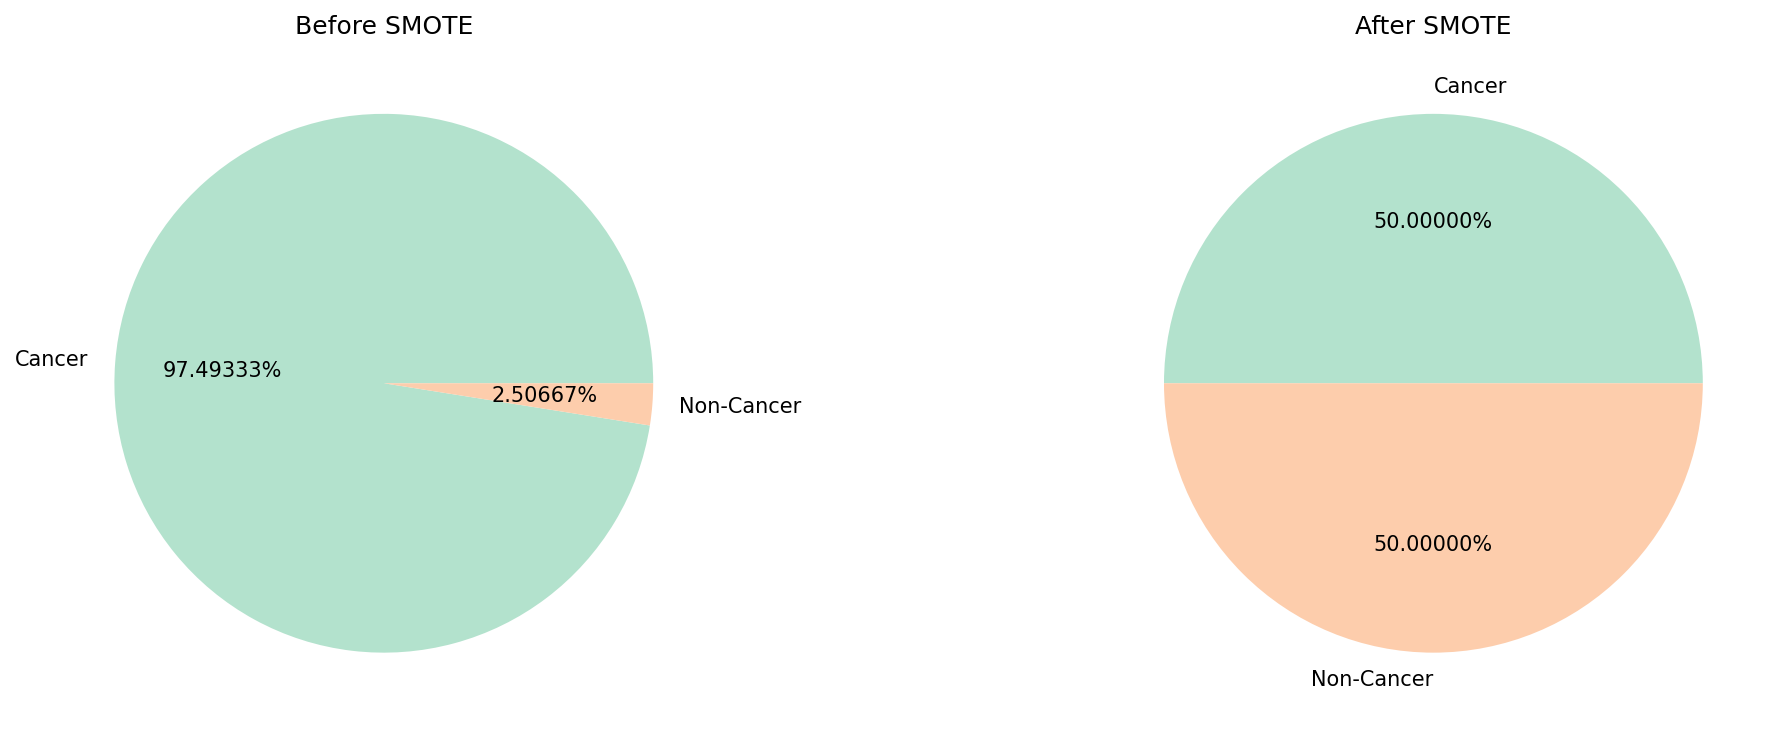

In [ ]:
colors = sns.color_palette('Pastel2')
fig, ax = plt.subplots(1,2)

ax[0].set_title('Before SMOTE')
ax[0].pie(df1.value_counts(), labels=['Cancer', 'Non-Cancer'], colors=colors, autopct='%.5f%%')

#### SMOTE
smote = SMOTE(random_state=1)
#### Oversampling
df_x_over, df_y_over = smote.fit_resample(df_bmi, df1)
ax[1].set_title('After SMOTE')
ax[1].pie(df_y_over.value_counts(), labels=['Cancer', 'Non-Cancer'], colors=colors, autopct='%.5f%%')

plt.tight_layout()

In [ ]:
#### Cross Validation
scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'f1':'f1', 'recall':'recall', 'precision':'precision'}

# Build Model
rf = RandomForestClassifier(min_samples_split=3,
                            random_state=1)
gb = GradientBoostingClassifier(min_samples_split=3,
                                random_state=1)
ada = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.1,
                         random_state=1)
mlp = MLPClassifier(activation='logistic',
                    solver='lbfgs',
                    max_iter=2000,
                    hidden_layer_sizes=(10,),
                    random_state=1)

# Cross Validation
rfs=cross_validate(estimator=rf,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
gbs=cross_validate(estimator=gb,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
adas=cross_validate(estimator=ada,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
mlps=cross_validate(estimator=mlp,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)

df_score_1 = pd.DataFrame({'Accuracy' : [rfs['test_Accuracy'].mean(), gbs['test_Accuracy'].mean(), adas['test_Accuracy'].mean(), mlps['test_Accuracy'].mean()],
                           'Accuracy STD' : [rfs['test_Accuracy'].std()*2, gbs['test_Accuracy'].std()*2, adas['test_Accuracy'].std()*2, mlps['test_Accuracy'].std()*2],
                           'AUC' : [rfs['test_roc_auc'].mean(), gbs['test_roc_auc'].mean(), adas['test_roc_auc'].mean(), mlps['test_roc_auc'].mean()],
                           'AUC STD' : [rfs['test_roc_auc'].std()*2, gbs['test_roc_auc'].std()*2, adas['test_roc_auc'].std()*2, mlps['test_roc_auc'].std()*2],
                           'F1-Score' : [rfs['test_f1'].mean(), gbs['test_f1'].mean(), adas['test_f1'].mean(), mlps['test_f1'].mean()],
                           'F1-Score STD' : [rfs['test_f1'].std()*2, gbs['test_f1'].std()*2, adas['test_f1'].std()*2, mlps['test_f1'].std()*2],
                           'Precision' : [rfs['test_precision'].mean(), gbs['test_precision'].mean(), adas['test_precision'].mean(), mlps['test_precision'].mean()],
                           'Precision STD' : [rfs['test_precision'].std()*2, gbs['test_precision'].std()*2, adas['test_precision'].std()*2, mlps['test_precision'].std()*2],
                           'Recall' : [rfs['test_recall'].mean(), gbs['test_recall'].mean(), adas['test_recall'].mean(), mlps['test_recall'].mean()],
                           'Recall STD' : [rfs['test_recall'].std()*2, gbs['test_recall'].std()*2, adas['test_recall'].std()*2, mlps['test_recall'].std()*2]},
                          index=['RandomForest', 'GradientBoosting', 'AdaBoost', 'MLP'])

df_score_1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Accuracy  Accuracy STD       AUC   AUC STD  F1-Score  \
RandomForest      0.952373      0.028529  0.989054  0.021874  0.951415   
GradientBoosting  0.796330      0.047149  0.874987  0.043495  0.786631   
AdaBoost          0.734274      0.052806  0.810402  0.047737  0.714337   
MLP               0.711160      0.061008  0.781596  0.070345  0.687300   

                  F1-Score STD  Precision  Precision STD    Recall  Recall STD  
RandomForest          0.027695   0.974464       0.050229  0.929705    0.014188  
GradientBoosting      0.051266   0.825746       0.052619  0.751850    0.069669  
AdaBoost              0.067189   0.770589       0.045804  0.666923    0.096347  
MLP                   0.079658   0.746987       0.053454  0.637999    0.112381

<Axes: xlabel='importance', ylabel='feature'>

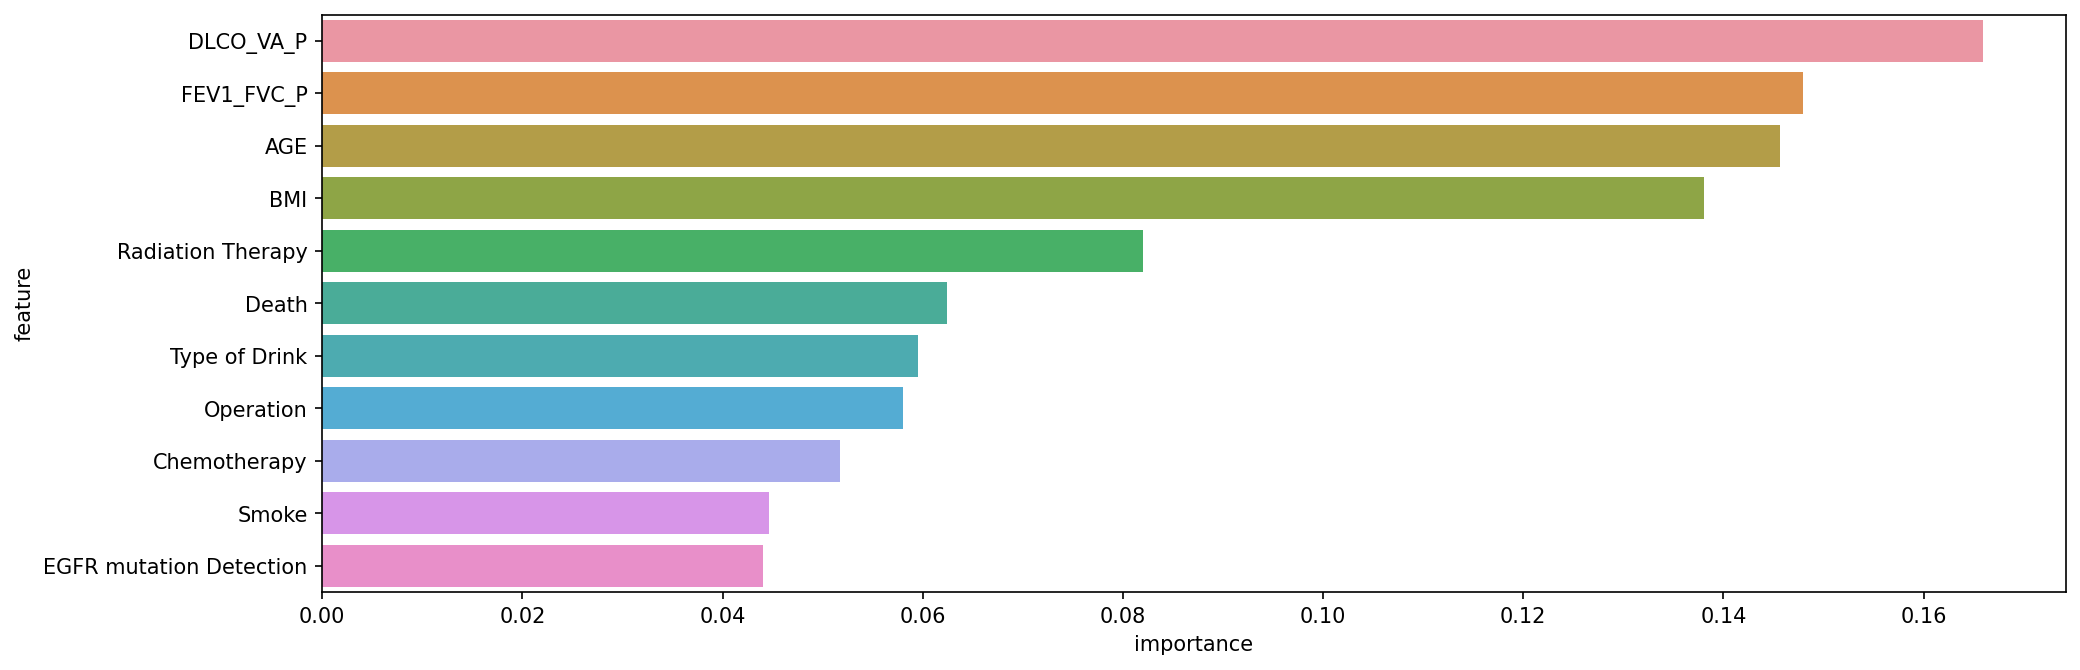

In [ ]:
#### Feature Importances
rf = RandomForestClassifier(min_samples_split=3,
                            random_state=1)
rf.fit(df_x_over, df_y_over)
feat_importance = pd.DataFrame()
feat_importance['feature'] = df_bmi.columns
feat_importance['importance'] = rf.feature_importances_
feat_importance = feat_importance.sort_values(by='importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feat_importance)

In [ ]:
###### Fit and Save models
rf = RandomForestClassifier(min_samples_split=3,
                            random_state=1)
rf.fit(df_x_over, df_y_over)
with open('Cancer.pkl', 'wb') as p:
  pickle.dump(rf, p)

----
# Prediction: Do the patients have non-small cell carcinoma?

<Figure size 2400x900 with 0 Axes>

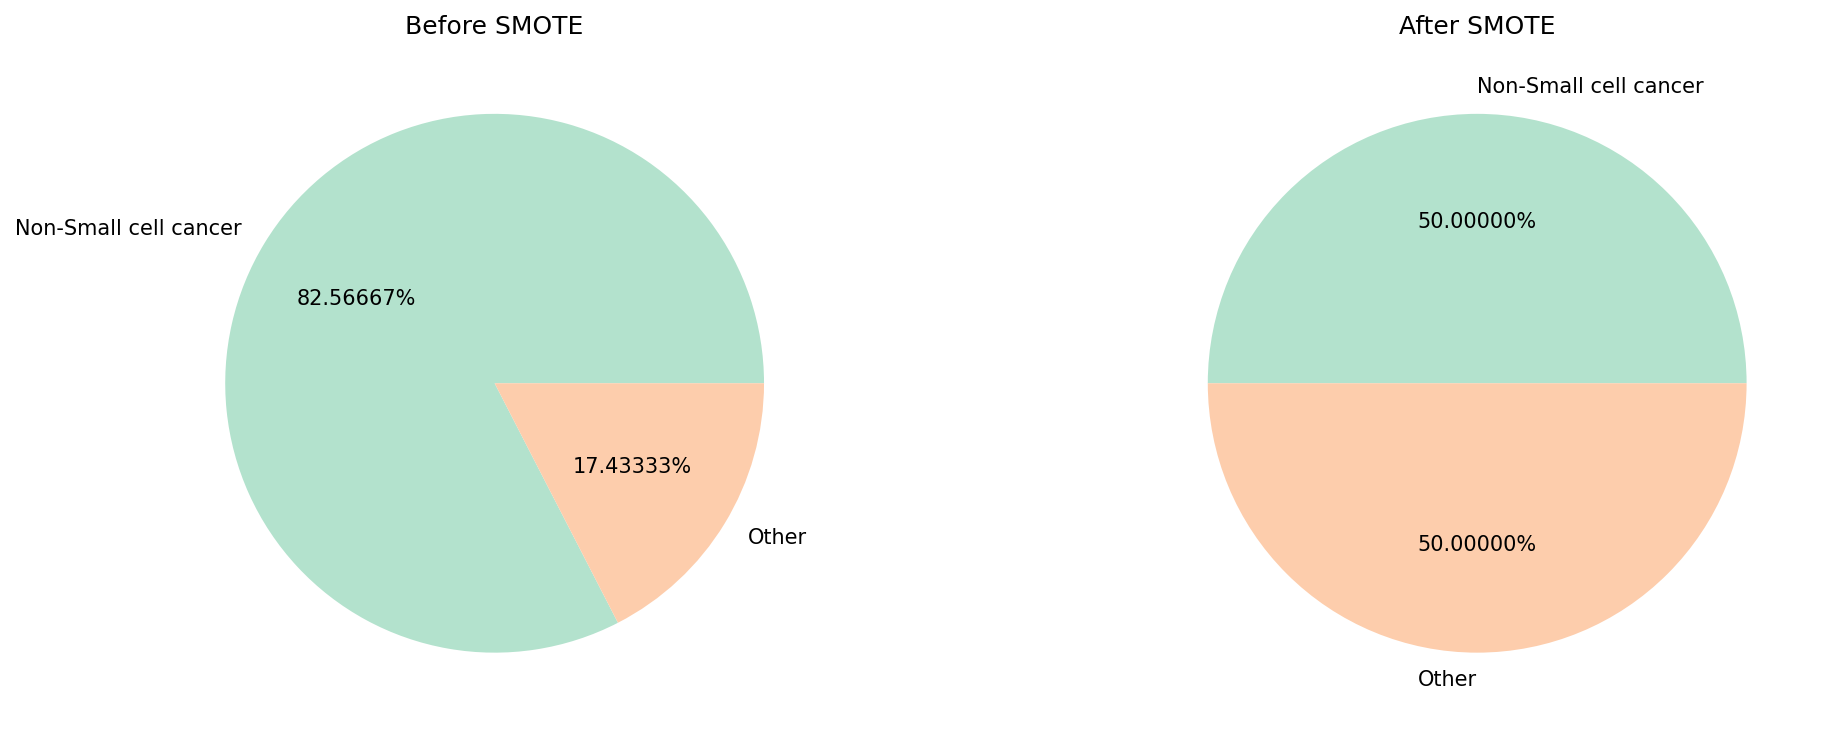

In [ ]:
df2 = df_non_small.loc[:, 'Adenocarcinoma':'Squamous cell carcinoma'].sum(axis=1)
df2 = df2.apply(lambda x: 1 if x>0 else 0)

colors = sns.color_palette('Pastel2')
plt.figure(figsize=(16,6), dpi=150)
fig, ax = plt.subplots(1,2)

ax[0].set_title('Before SMOTE')
ax[0].pie(df2.value_counts(), labels=['Non-Small cell cancer', 'Other'], colors=colors, autopct='%.5f%%')

#### SMOTE
smote = SMOTE(random_state=1)
#### Oversampling
df_x_over, df_y_over = smote.fit_resample(df_bmi, df2)
ax[1].set_title('After SMOTE')
ax[1].pie(df_y_over.value_counts(), labels=['Non-Small cell cancer', 'Other'], colors=colors, autopct='%.5f%%')

plt.tight_layout()

In [1]:
#### Cross Validation
scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'f1':'f1', 'recall':'recall', 'precision':'precision'}

# Build Model
rf = RandomForestClassifier(min_samples_split=3,
                            random_state=1)
gb = GradientBoostingClassifier(min_samples_split=3,
                                random_state=1)
ada = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.1,
                         random_state=1)
mlp = MLPClassifier(activation='logistic',
                    solver='lbfgs',
                    max_iter=1000,
                    hidden_layer_sizes=(10,),
                    random_state=1)

# Cross Validation
rfs=cross_validate(estimator=rf,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
gbs=cross_validate(estimator=gb,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
adas=cross_validate(estimator=ada,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
mlps=cross_validate(estimator=mlp,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)

df_score_2 = pd.DataFrame({'Accuracy' : [rfs['test_Accuracy'].mean(), gbs['test_Accuracy'].mean(), adas['test_Accuracy'].mean(), mlps['test_Accuracy'].mean()],
                           'Accuracy STD' : [rfs['test_Accuracy'].std()*2, gbs['test_Accuracy'].std()*2, adas['test_Accuracy'].std()*2, mlps['test_Accuracy'].std()*2],
                           'AUC' : [rfs['test_roc_auc'].mean(), gbs['test_roc_auc'].mean(), adas['test_roc_auc'].mean(), mlps['test_roc_auc'].mean()],
                           'AUC STD' : [rfs['test_roc_auc'].std()*2, gbs['test_roc_auc'].std()*2, adas['test_roc_auc'].std()*2, mlps['test_roc_auc'].std()*2],
                           'F1-Score' : [rfs['test_f1'].mean(), gbs['test_f1'].mean(), adas['test_f1'].mean(), mlps['test_f1'].mean()],
                           'F1-Score STD' : [rfs['test_f1'].std()*2, gbs['test_f1'].std()*2, adas['test_f1'].std()*2, mlps['test_f1'].std()*2],
                           'Precision' : [rfs['test_precision'].mean(), gbs['test_precision'].mean(), adas['test_precision'].mean(), mlps['test_precision'].mean()],
                           'Precision STD' : [rfs['test_precision'].std()*2, gbs['test_precision'].std()*2, adas['test_precision'].std()*2, mlps['test_precision'].std()*2],
                           'Recall' : [rfs['test_recall'].mean(), gbs['test_recall'].mean(), adas['test_recall'].mean(), mlps['test_recall'].mean()],
                           'Recall STD' : [rfs['test_recall'].std()*2, gbs['test_recall'].std()*2, adas['test_recall'].std()*2, mlps['test_recall'].std()*2]},
                          index=['RandomForest', 'GradientBoosting', 'AdaBoost', 'MLP'])

df_score_2

NameError: ignored

In [ ]:
###### Fit and Save models
rf = RandomForestClassifier(min_samples_split=3,
                            random_state=1)
rf.fit(df_x_over, df_y_over)
with open('Nonsmall.pkl', 'wb') as p:
  pickle.dump(rf, p)

# Prediction: Do the patients have small cell carcinoma (T stage)?

<Figure size 2400x900 with 0 Axes>

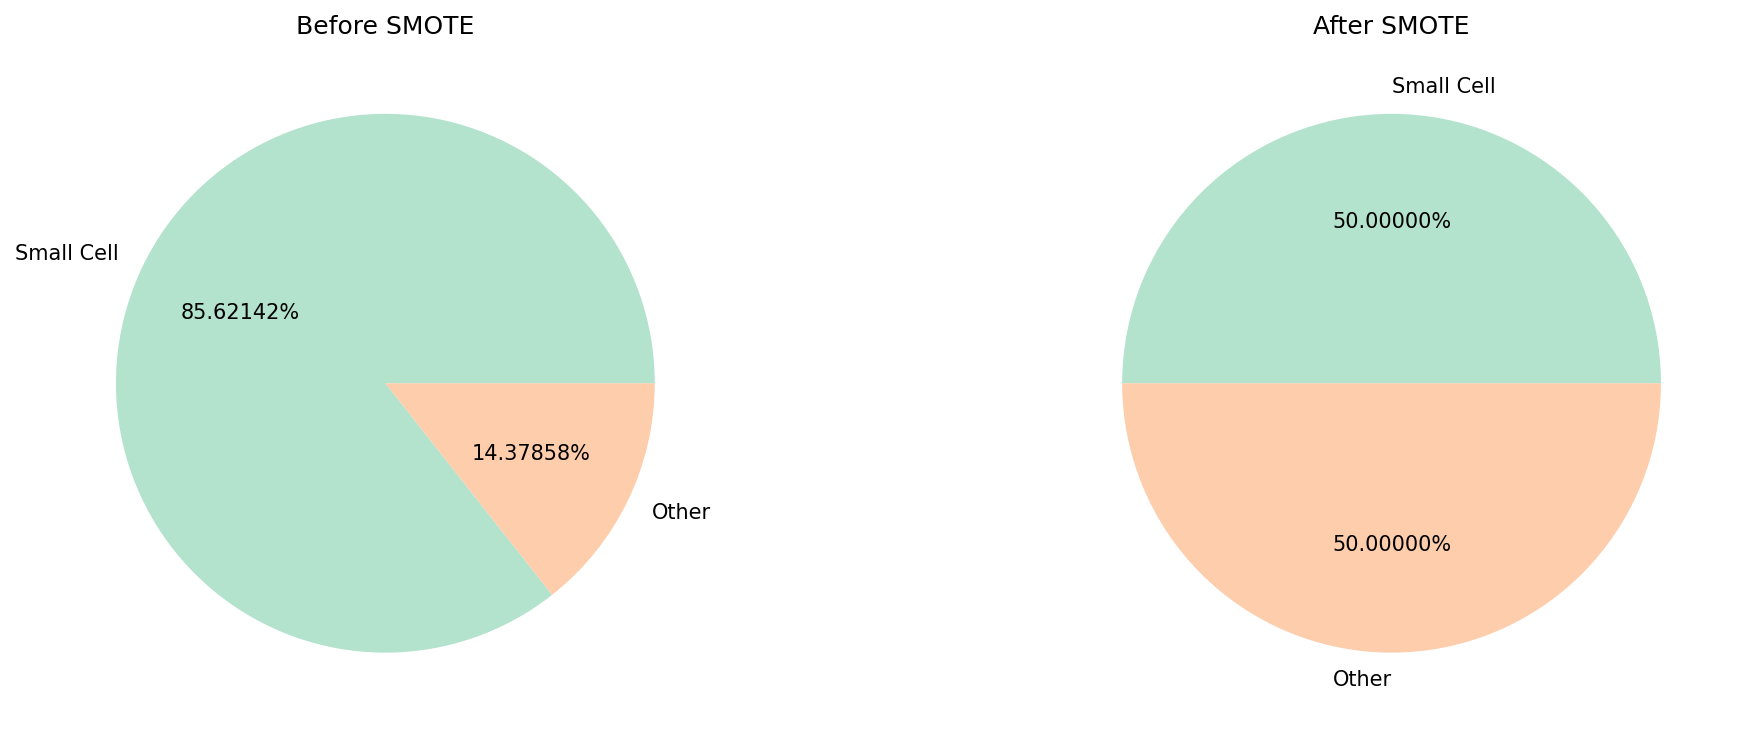

In [ ]:
df_tmp = pd.concat([df, df_bmi], axis=1)
df_tmp = df_tmp[(df_tmp['Adenocarcinoma']==0) & (df_tmp['Squamous cell carcinoma']==0) & (df_tmp['Large cell carcinoma']==0)]

df3_bmi = df_tmp[['AGE',	'Type of Drink',	'Smoke',	'FEV1_FVC_P',	'DLCO_VA_P', 'EGFR mutation Detection',	'Operation',	'Chemotherapy',	'Radiation Therapy',	'Death',	'BMI']]
df3 = df_tmp.loc[:, 'T1':'T4'].sum(axis=1)
df3 = df3.apply(lambda x: 1 if x>0 else 0)

colors = sns.color_palette('Pastel2')
plt.figure(figsize=(16,6), dpi=150)
fig, ax = plt.subplots(1,2)

ax[0].set_title('Before SMOTE')
ax[0].pie(df3.value_counts(), labels=['Small Cell', 'Other'], colors=colors, autopct='%.5f%%')

#### SMOTE
smote = SMOTE(random_state=1)
#### Oversampling
df_x_over, df_y_over = smote.fit_resample(df3_bmi, df3)
ax[1].set_title('After SMOTE')
ax[1].pie(df_y_over.value_counts(), labels=['Small Cell', 'Other'], colors=colors, autopct='%.5f%%')

plt.tight_layout()

In [ ]:
#### Cross Validation
scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'f1':'f1', 'recall':'recall', 'precision':'precision'}

# Build Model
rf = RandomForestClassifier(min_samples_split=3,
                            random_state=1)
gb = GradientBoostingClassifier(min_samples_split=3,
                                random_state=1)
ada = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.1,
                         random_state=1)
mlp = MLPClassifier(activation='logistic',
                    solver='lbfgs',
                    max_iter=1000,
                    hidden_layer_sizes=(10,),
                    random_state=1)

# Cross Validation
rfs=cross_validate(estimator=rf,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
gbs=cross_validate(estimator=gb,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
adas=cross_validate(estimator=ada,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
mlps=cross_validate(estimator=mlp,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)

df_score_3 = pd.DataFrame({'Accuracy' : [rfs['test_Accuracy'].mean(), gbs['test_Accuracy'].mean(), adas['test_Accuracy'].mean(), mlps['test_Accuracy'].mean()],
                           'Accuracy STD' : [rfs['test_Accuracy'].std()*2, gbs['test_Accuracy'].std()*2, adas['test_Accuracy'].std()*2, mlps['test_Accuracy'].std()*2],
                           'AUC' : [rfs['test_roc_auc'].mean(), gbs['test_roc_auc'].mean(), adas['test_roc_auc'].mean(), mlps['test_roc_auc'].mean()],
                           'AUC STD' : [rfs['test_roc_auc'].std()*2, gbs['test_roc_auc'].std()*2, adas['test_roc_auc'].std()*2, mlps['test_roc_auc'].std()*2],
                           'F1-Score' : [rfs['test_f1'].mean(), gbs['test_f1'].mean(), adas['test_f1'].mean(), mlps['test_f1'].mean()],
                           'F1-Score STD' : [rfs['test_f1'].std()*2, gbs['test_f1'].std()*2, adas['test_f1'].std()*2, mlps['test_f1'].std()*2],
                           'Precision' : [rfs['test_precision'].mean(), gbs['test_precision'].mean(), adas['test_precision'].mean(), mlps['test_precision'].mean()],
                           'Precision STD' : [rfs['test_precision'].std()*2, gbs['test_precision'].std()*2, adas['test_precision'].std()*2, mlps['test_precision'].std()*2],
                           'Recall' : [rfs['test_recall'].mean(), gbs['test_recall'].mean(), adas['test_recall'].mean(), mlps['test_recall'].mean()],
                           'Recall STD' : [rfs['test_recall'].std()*2, gbs['test_recall'].std()*2, adas['test_recall'].std()*2, mlps['test_recall'].std()*2]},
                          index=['RandomForest', 'GradientBoosting', 'AdaBoost', 'MLP'])

df_score_3

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Accuracy  Accuracy STD       AUC   AUC STD  F1-Score  \
RandomForest      0.838570      0.160627  0.913376  0.152518  0.839193   
GradientBoosting  0.759745      0.167854  0.832246  0.178878  0.754720   
AdaBoost          0.708162      0.172032  0.768804  0.205502  0.690800   
MLP               0.642265      0.138229  0.681962  0.156002  0.656244   

                  F1-Score STD  Precision  Precision STD    Recall  Recall STD  
RandomForest          0.126438   0.875995       0.235129  0.814216    0.067724  
GradientBoosting      0.121441   0.805118       0.230626  0.723562    0.123134  
AdaBoost              0.140553   0.758902       0.220495  0.645418    0.151960  
MLP                   0.089497   0.647006       0.187730  0.674871    0.068398

In [ ]:
###### Fit and Save models
rf = RandomForestClassifier(min_samples_split=3,
                            random_state=1)
rf.fit(df_x_over, df_y_over)
with open('Small.pkl', 'wb') as p:
  pickle.dump(rf, p)

# Prediction: Do the patients have small cell carcinoma or Non-small cell carcinoma?

In [ ]:
df_tmp = pd.concat([df, df_bmi], axis=1)

df_tmp['Small'] = df_tmp.loc[:, 'T1':'T4'].sum(axis=1)
df_tmp['Nonsmall'] = df_tmp.loc[:, 'Adenocarcinoma':'Squamous cell carcinoma'].sum(axis=1)
df_tmp['Small'] = df_tmp['Small'].apply(lambda x: 1 if x>0 else 0)
df_tmp['Nonsmall'] = df_tmp['Nonsmall'].apply(lambda x: 1 if x>0 else 0)
df_tmp = df_tmp[(df_tmp['Small']==1) | (df_tmp['Nonsmall']==1)]
df_tmp['NS'] = df_tmp.loc[:, 'Small':'Nonsmall'].sum(axis=1)
df_tmp

AGE  Adenocarcinoma  Large cell carcinoma  Squamous cell carcinoma  TX  \
0       72               1                     1                        0   1   
1       66               1                     0                        0   0   
2       75               1                     1                        0   1   
3       77               1                     0                        1   0   
4       85               1                     0                        0   0   
...    ...             ...                   ...                      ...  ..   
14995   47               1                     1                        0   0   
14996   44               1                     0                        1   0   
14997   80               0                     0                        1   0   
14998   69               1                     0                        0   0   
14999   81               0                     1                        0   0   

       T0  T1  T1a  T1b  T1c  ...  DLCO_VA_P  EGFR mutation Detection  \
0       0   0    0    1    0  ...        102                       99   
1       0   1    0    0    0  ...        112                       99   
2       0   0    0    0    0  ...         73                       99   
3       0   1    0    1    0  ...        137                        1   
4       0   0    0    0    1  ...         85                       99   
...    ..  ..  ...  ...  ...  ...        ...                      ...   
14995   0   0    0    0    1  ...         79                       99   
14996   0   1    1    1    1  ...         67                       99   
14997   0   0    1    0    0  ...        137                        0   
14998   0   0    0    0    0  ...         77                        0   
14999   0   1    0    1    0  ...         66                        0   

       Operation  Chemotherapy  Radiation Therapy  Death        BMI  Small  \
0              1             0                  0      0  33.822654      1   
1              0             1                  0      0  18.984376      1   
2              0             1                  0      0  25.596524      0   
3              0             0                  0      0  31.486033      1   
4              1             0                  1      0  14.922211      1   
...          ...           ...                ...    ...        ...    ...   
14995          1             0                  0      0  36.262219      1   
14996          0             0                  0      0  18.244814      1   
14997          1             1                  0      0  23.372705      1   
14998          1             1                  1      0  20.209401      1   
14999          0             1                  0      0  16.912454      1   

       Nonsmall  NS  
0             1   2  
1             1   2  
2             1   1  
3             1   2  
4             1   2  
...         ...  ..  
14995         1   2  
14996         1   2  
14997         1   2  
14998         1   2  
14999         1   2  

[14624 rows x 47 columns]

<Figure size 2400x900 with 0 Axes>

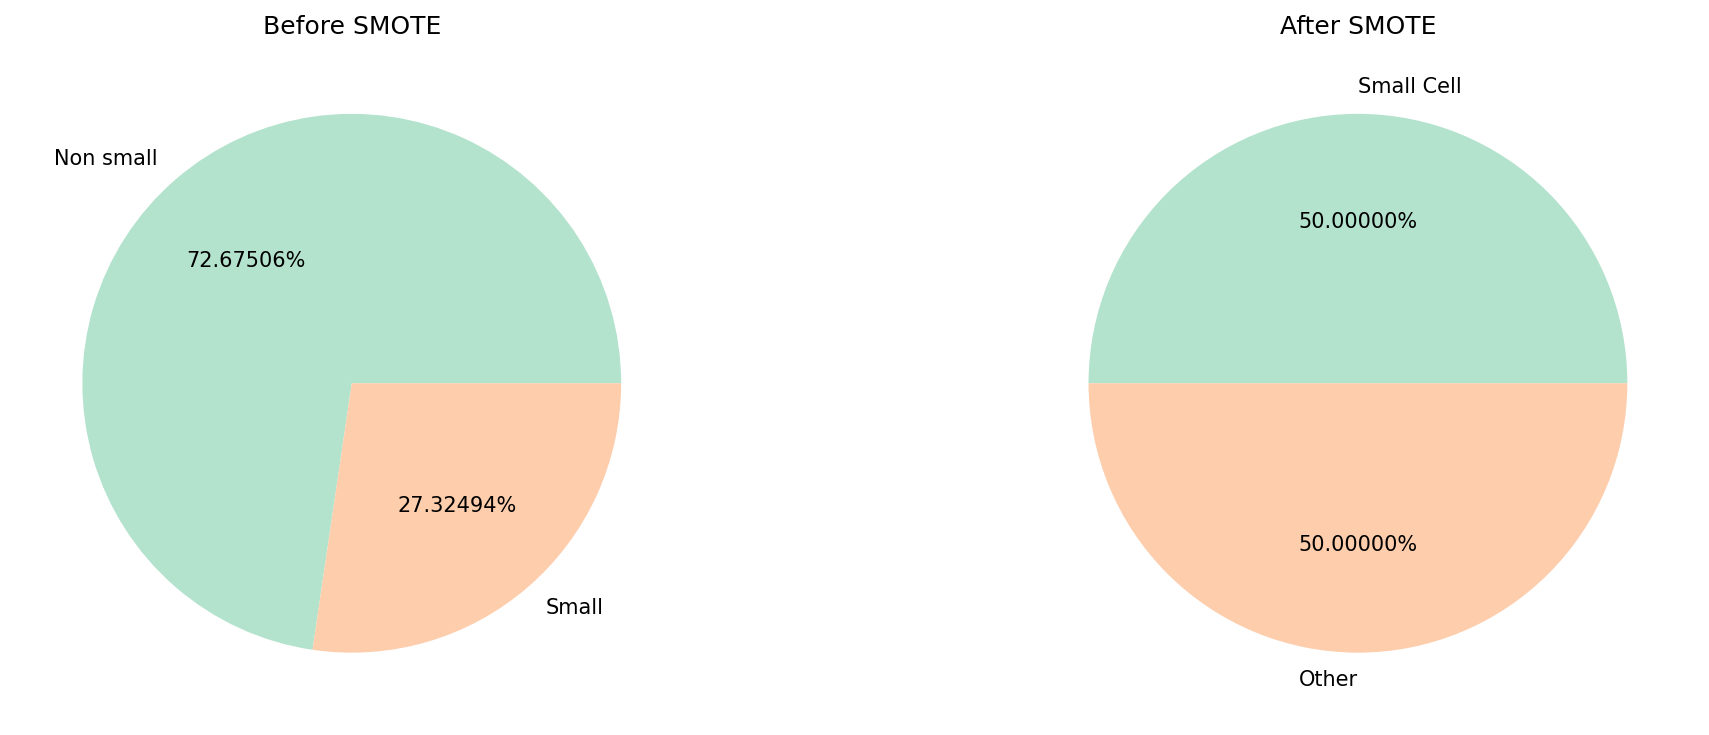

In [ ]:
df4_bmi = df_tmp[['AGE',	'Type of Drink',	'Smoke',	'FEV1_FVC_P',	'DLCO_VA_P', 'EGFR mutation Detection',	'Operation',	'Chemotherapy',	'Radiation Therapy',	'Death',	'BMI']]
df4 = df_tmp.loc[:, 'NS']
df4 = df4.apply(lambda x: 1 if x>1 else 0)

colors = sns.color_palette('Pastel2')
plt.figure(figsize=(16,6), dpi=150)
fig, ax = plt.subplots(1,2)

ax[0].set_title('Before SMOTE')
ax[0].pie(df4.value_counts(), labels=['Non small', 'Small'], colors=colors, autopct='%.5f%%')

#### SMOTE
smote = SMOTE(random_state=1)
#### Oversampling
df_x_over, df_y_over = smote.fit_resample(df4_bmi, df4)
ax[1].set_title('After SMOTE')
ax[1].pie(df_y_over.value_counts(), labels=['Small Cell', 'Other'], colors=colors, autopct='%.5f%%')

plt.tight_layout()

In [ ]:
#### Cross Validation
scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'f1':'f1', 'recall':'recall', 'precision':'precision'}

# Build Model
rf = RandomForestClassifier(min_samples_split=3,
                            random_state=1)
gb = GradientBoostingClassifier(min_samples_split=3,
                                random_state=1)
ada = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.1,
                         random_state=1)
mlp = MLPClassifier(activation='logistic',
                    solver='lbfgs',
                    max_iter=1000,
                    hidden_layer_sizes=(10,),
                    random_state=1)

# Cross Validation
rfs=cross_validate(estimator=rf,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
gbs=cross_validate(estimator=gb,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
adas=cross_validate(estimator=ada,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
mlps=cross_validate(estimator=mlp,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)

df_score_4 = pd.DataFrame({'Accuracy' : [rfs['test_Accuracy'].mean(), gbs['test_Accuracy'].mean(), adas['test_Accuracy'].mean(), mlps['test_Accuracy'].mean()],
                           'Accuracy STD' : [rfs['test_Accuracy'].std()*2, gbs['test_Accuracy'].std()*2, adas['test_Accuracy'].std()*2, mlps['test_Accuracy'].std()*2],
                           'AUC' : [rfs['test_roc_auc'].mean(), gbs['test_roc_auc'].mean(), adas['test_roc_auc'].mean(), mlps['test_roc_auc'].mean()],
                           'AUC STD' : [rfs['test_roc_auc'].std()*2, gbs['test_roc_auc'].std()*2, adas['test_roc_auc'].std()*2, mlps['test_roc_auc'].std()*2],
                           'F1-Score' : [rfs['test_f1'].mean(), gbs['test_f1'].mean(), adas['test_f1'].mean(), mlps['test_f1'].mean()],
                           'F1-Score STD' : [rfs['test_f1'].std()*2, gbs['test_f1'].std()*2, adas['test_f1'].std()*2, mlps['test_f1'].std()*2],
                           'Precision' : [rfs['test_precision'].mean(), gbs['test_precision'].mean(), adas['test_precision'].mean(), mlps['test_precision'].mean()],
                           'Precision STD' : [rfs['test_precision'].std()*2, gbs['test_precision'].std()*2, adas['test_precision'].std()*2, mlps['test_precision'].std()*2],
                           'Recall' : [rfs['test_recall'].mean(), gbs['test_recall'].mean(), adas['test_recall'].mean(), mlps['test_recall'].mean()],
                           'Recall STD' : [rfs['test_recall'].std()*2, gbs['test_recall'].std()*2, adas['test_recall'].std()*2, mlps['test_recall'].std()*2]},
                          index=['RandomForest', 'GradientBoosting', 'AdaBoost', 'MLP'])

df_score_4

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Accuracy  Accuracy STD       AUC   AUC STD  F1-Score  \
RandomForest      0.704231      0.203407  0.771701  0.275783  0.712433   
GradientBoosting  0.641613      0.220556  0.690634  0.315310  0.648782   
AdaBoost          0.622183      0.201579  0.668833  0.285443  0.613916   
MLP               0.626135      0.212456  0.663506  0.288291  0.635600   

                  F1-Score STD  Precision  Precision STD    Recall  Recall STD  
RandomForest          0.126863   0.739222       0.290832  0.706247    0.056806  
GradientBoosting      0.136408   0.673905       0.276043  0.641517    0.068013  
AdaBoost              0.118251   0.665503       0.273580  0.585531    0.073742  
MLP                   0.161956   0.638122       0.229299  0.640492    0.125345

In [ ]:
###### Fit and Save models
rf = RandomForestClassifier(min_samples_split=3,
                            random_state=1)
rf.fit(df_x_over, df_y_over)
with open('Small.pkl', 'wb') as p:
  pickle.dump(rf, p)

# Will they live or not?

In [ ]:
df_tmp = df.copy()
df_tmp['BMI'] = df_bmi['BMI']
df_tmp['Small'] = df_tmp.loc[:, 'T1':'T4'].sum(axis=1)
df_tmp['Nonsmall'] = df_tmp.loc[:, 'Adenocarcinoma':'Squamous cell carcinoma'].sum(axis=1)
df_tmp['Small'] = df_tmp['Small'].apply(lambda x: 1 if x>0 else 0)
df_tmp['Nonsmall'] = df_tmp['Nonsmall'].apply(lambda x: 1 if x>0 else 0)
df_tmp = df_tmp[(df_tmp['Small']==1) | (df_tmp['Nonsmall']==1)]
df_death = df_tmp.loc[:, 'Death']
df_tmp = df_tmp.loc[:, 'Type of Drink':'Nonsmall']
df_tmp#.columns
df_tmp = pd.concat([df_tmp.loc[:, :'Radiation Therapy'], df_tmp.loc[:, 'BMI':]], axis=1)
df_tmp

Type of Drink  Smoke  Height  Weight  FEV1_FVC_P  DLCO_VA_P  \
0                 99      2   142.0    68.2          87        102   
1                 99      2   179.4    61.1          54        112   
2                  3      2   169.8    73.8          79         73   
3                  2      2   158.5    79.1          78        137   
4                  2      2   172.3    44.3          48         85   
...              ...    ...     ...     ...         ...        ...   
14995             99      0   147.6    79.0          40         79   
14996             99      2   151.0    41.6          69         67   
14997              3      0   157.8    58.2          40        137   
14998              2      2   167.5    56.7          89         77   
14999              3      1   155.7    41.0          94         66   

       EGFR mutation Detection  Operation  Chemotherapy  Radiation Therapy  \
0                           99          1             0                  0   
1                           99          0             1                  0   
2                           99          0             1                  0   
3                            1          0             0                  0   
4                           99          1             0                  1   
...                        ...        ...           ...                ...   
14995                       99          1             0                  0   
14996                       99          0             0                  0   
14997                        0          1             1                  0   
14998                        0          1             1                  1   
14999                        0          0             1                  0   

             BMI  Small  Nonsmall  
0      33.822654      1         1  
1      18.984376      1         1  
2      25.596524      0         1  
3      31.486033      1         1  
4      14.922211      1         1  
...          ...    ...       ...  
14995  36.262219      1         1  
14996  18.244814      1         1  
14997  23.372705      1         1  
14998  20.209401      1         1  
14999  16.912454      1         1  

[14624 rows x 13 columns]

<Figure size 2400x900 with 0 Axes>

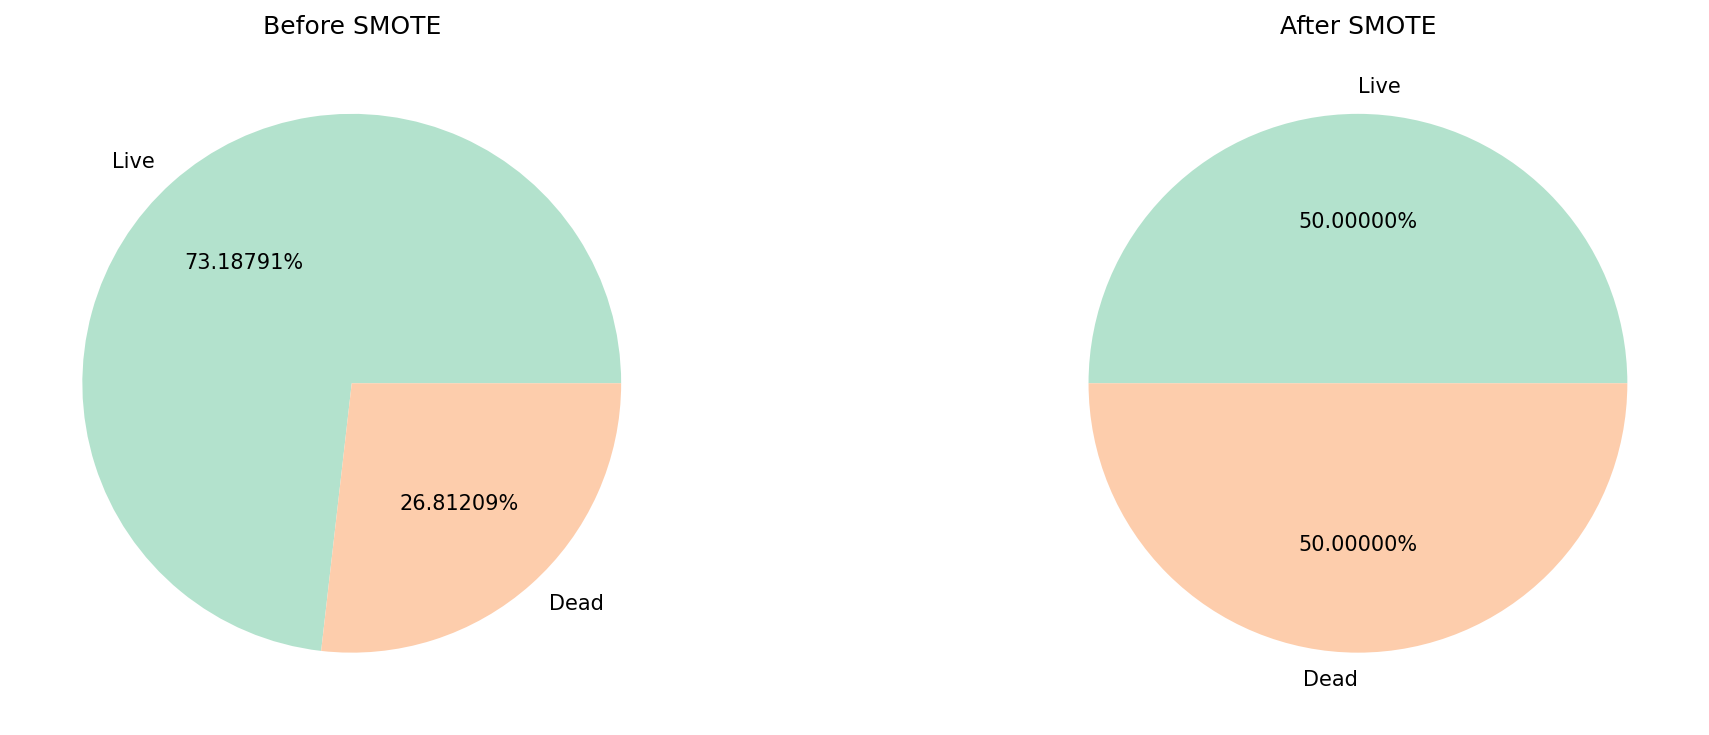

In [ ]:
colors = sns.color_palette('Pastel2')
plt.figure(figsize=(16,6), dpi=150)
fig, ax = plt.subplots(1,2)

ax[0].set_title('Before SMOTE')
ax[0].pie(df_death.value_counts(), labels=['Live', 'Dead'], colors=colors, autopct='%.5f%%')

#### SMOTE
smote = SMOTE(random_state=1)
#### Oversampling
df_x_over, df_y_over = smote.fit_resample(df_tmp, df_death)
ax[1].set_title('After SMOTE')
ax[1].pie(df_y_over.value_counts(), labels=['Live', 'Dead'], colors=colors, autopct='%.5f%%')

plt.tight_layout()

In [ ]:
#### Cross Validation
scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'f1':'f1', 'recall':'recall', 'precision':'precision'}

# Build Model
rf = RandomForestClassifier(min_samples_split=3,
                            random_state=1)
gb = GradientBoostingClassifier(min_samples_split=3,
                                random_state=1)
ada = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.1,
                         random_state=1)
mlp = MLPClassifier(activation='logistic',
                    solver='lbfgs',
                    max_iter=1000,
                    hidden_layer_sizes=(10,),
                    random_state=1)

# Cross Validation
rfs=cross_validate(estimator=rf,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
gbs=cross_validate(estimator=gb,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
adas=cross_validate(estimator=ada,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)
mlps=cross_validate(estimator=mlp,
                   scoring=scorers,
                   X=df_x_over,
                   y=df_y_over,
                   cv=5)

df_score_5 = pd.DataFrame({'Accuracy' : [rfs['test_Accuracy'].mean(), gbs['test_Accuracy'].mean(), adas['test_Accuracy'].mean(), mlps['test_Accuracy'].mean()],
                           'Accuracy STD' : [rfs['test_Accuracy'].std()*2, gbs['test_Accuracy'].std()*2, adas['test_Accuracy'].std()*2, mlps['test_Accuracy'].std()*2],
                           'AUC' : [rfs['test_roc_auc'].mean(), gbs['test_roc_auc'].mean(), adas['test_roc_auc'].mean(), mlps['test_roc_auc'].mean()],
                           'AUC STD' : [rfs['test_roc_auc'].std()*2, gbs['test_roc_auc'].std()*2, adas['test_roc_auc'].std()*2, mlps['test_roc_auc'].std()*2],
                           'F1-Score' : [rfs['test_f1'].mean(), gbs['test_f1'].mean(), adas['test_f1'].mean(), mlps['test_f1'].mean()],
                           'F1-Score STD' : [rfs['test_f1'].std()*2, gbs['test_f1'].std()*2, adas['test_f1'].std()*2, mlps['test_f1'].std()*2],
                           'Precision' : [rfs['test_precision'].mean(), gbs['test_precision'].mean(), adas['test_precision'].mean(), mlps['test_precision'].mean()],
                           'Precision STD' : [rfs['test_precision'].std()*2, gbs['test_precision'].std()*2, adas['test_precision'].std()*2, mlps['test_precision'].std()*2],
                           'Recall' : [rfs['test_recall'].mean(), gbs['test_recall'].mean(), adas['test_recall'].mean(), mlps['test_recall'].mean()],
                           'Recall STD' : [rfs['test_recall'].std()*2, gbs['test_recall'].std()*2, adas['test_recall'].std()*2, mlps['test_recall'].std()*2]},
                          index=['RandomForest', 'GradientBoosting', 'AdaBoost', 'MLP'])

df_score_5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy  Accuracy STD       AUC   AUC STD  F1-Score  \
RandomForest      0.712750      0.178561  0.787775  0.235833  0.691835   
GradientBoosting  0.636276      0.184068  0.690474  0.247105  0.608917   
AdaBoost          0.625064      0.167510  0.678219  0.231114  0.603288   
MLP               0.546577      0.055864  0.558927  0.082218  0.576588   

                  F1-Score STD  Precision  Precision STD    Recall  Recall STD  
RandomForest          0.282995   0.707953       0.092149  0.709143    0.460940  
GradientBoosting      0.311580   0.625479       0.138961  0.621693    0.459167  
AdaBoost              0.305902   0.611580       0.126517  0.626652    0.455125  
MLP                   0.111590   0.539442       0.048737  0.629095    0.226348

<Axes: xlabel='importance', ylabel='feature'>

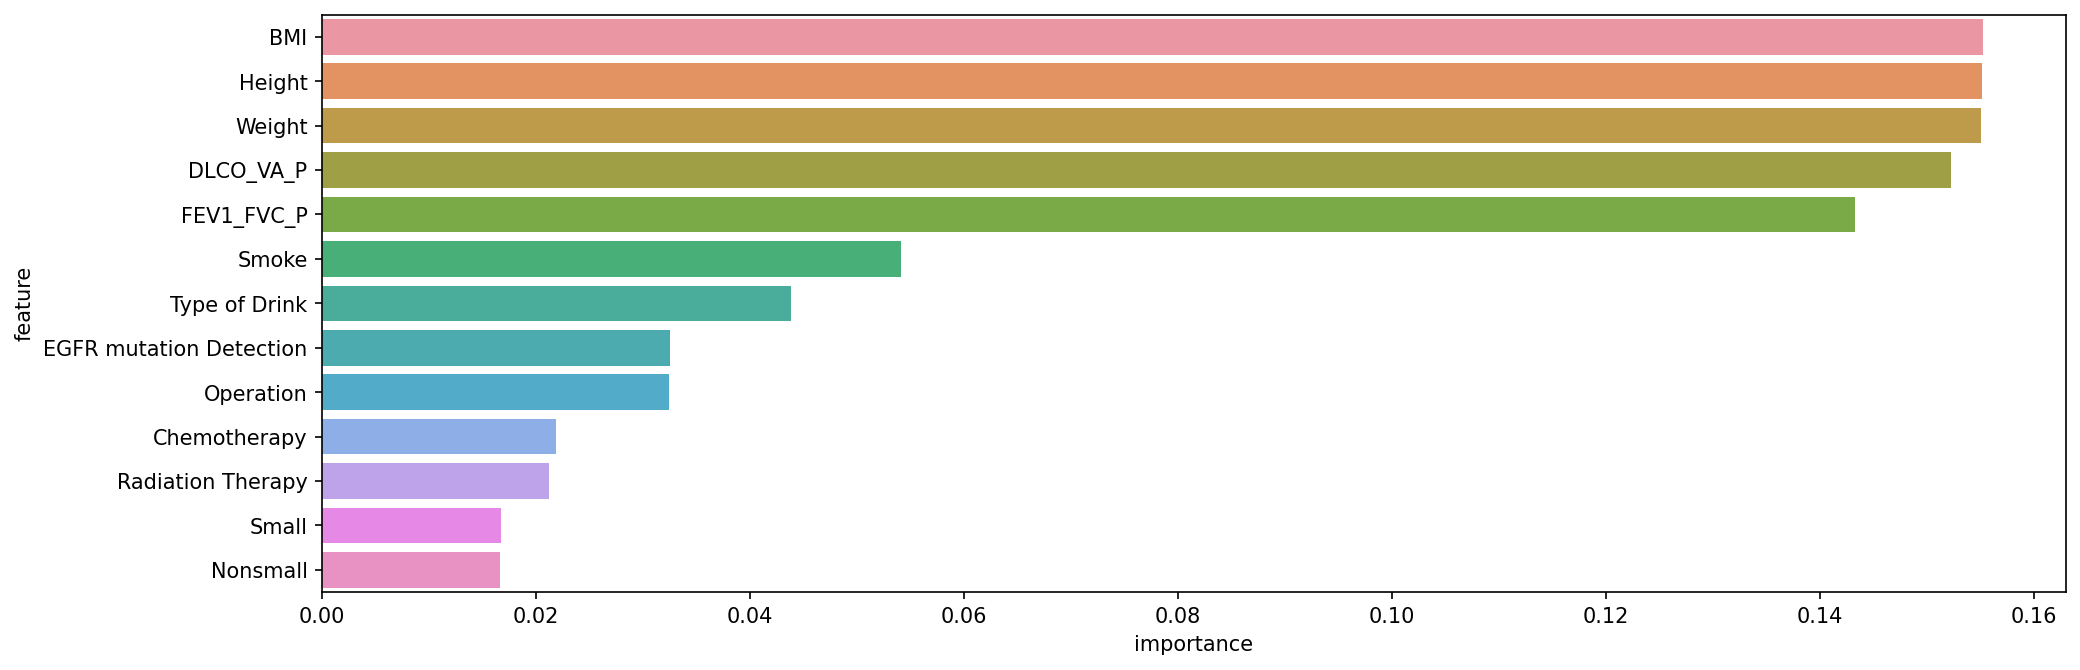

In [ ]:
#### Feature Importances
rf = RandomForestClassifier(min_samples_split=3,
                            random_state=1)
rf.fit(df_x_over, df_y_over)
feat_importance = pd.DataFrame()
feat_importance['feature'] = df_tmp.columns
feat_importance['importance'] = rf.feature_importances_
feat_importance = feat_importance.sort_values(by='importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feat_importance)

In [ ]:
#### Feature Importances
rf = RandomForestClassifier(min_samples_split=3,
                            random_state=1)
rf.fit(df_x_over, df_y_over)
feat_importance = pd.DataFrame()
feat_importance['feature'] = df_tmp.columns
feat_importance['importance'] = rf.feature_importances_
feat_importance = feat_importance.sort_values(by='importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feat_importance)

<Axes: xlabel='importance', ylabel='feature'>

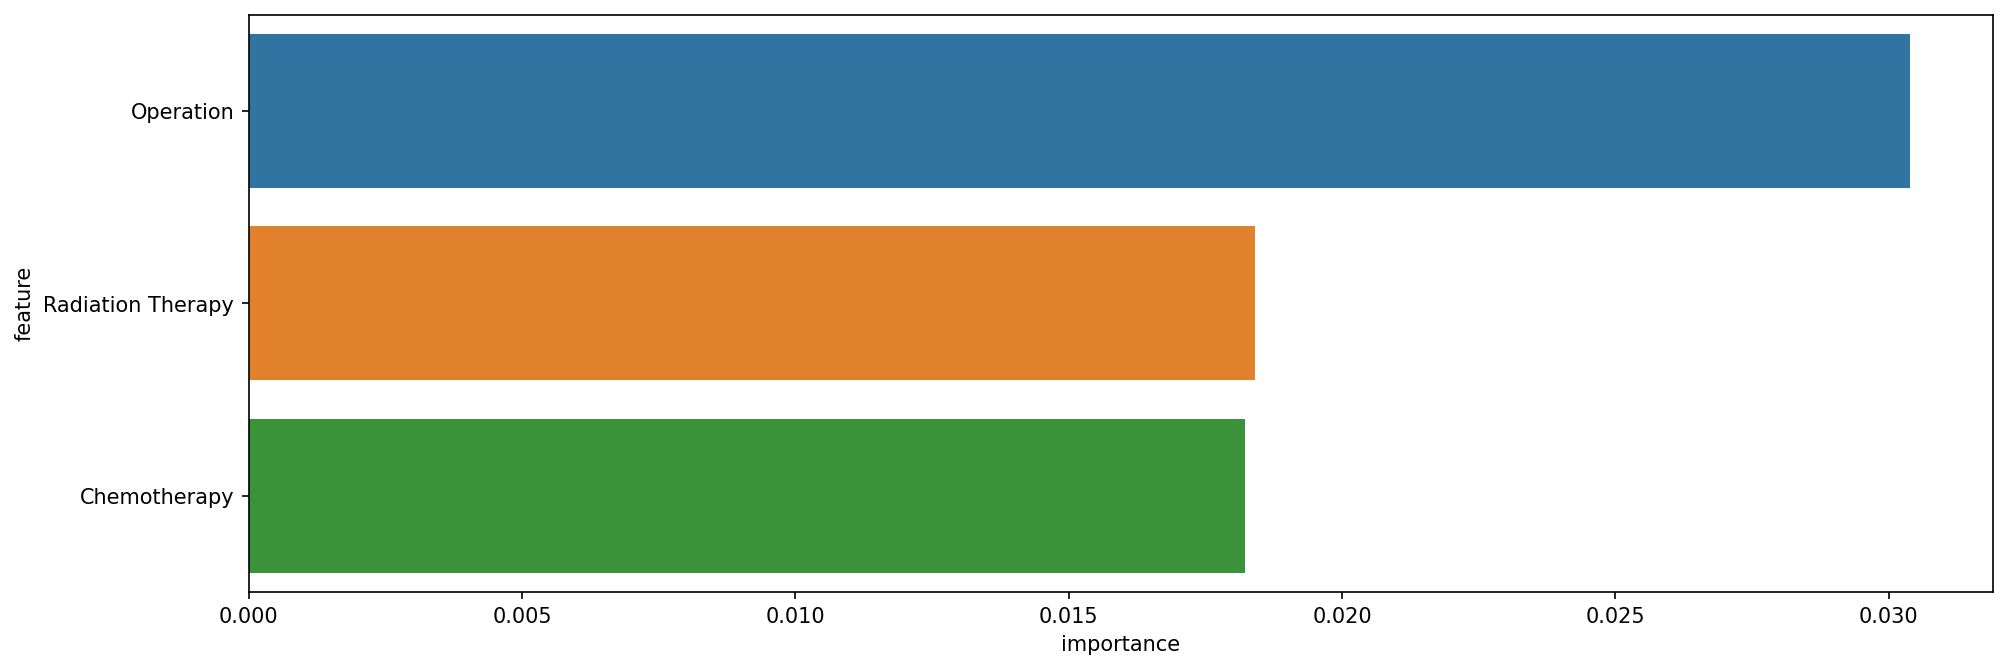

In [ ]:

sns.barplot(x='importance', y='feature', data=feat_importance[(feat_importance['feature']=='Operation') | (feat_importance['feature']=='Radiation Therapy') | (feat_importance['feature']=='Chemotherapy')])
#feat_importance['feature'] in ['Operation', 'Radiation Therapy', 'Chemotherapy']

In [ ]:
df_tmp = pd.concat([df, df_bmi], axis=1)
df_tmp = df_tmp[(df_tmp['Death']==1)]

df4_bmi = df_tmp[['AGE',	'Type of Drink',	'Smoke',	'FEV1_FVC_P',	'DLCO_VA_P', 'EGFR mutation Detection',	'Operation',	'Chemotherapy',	'Radiation Therapy', 'BMI']]
df4 = df_tmp.loc[:, 'T1':'T4'].sum(axis=1)
['AGE', 'Adenocarcinoma', 'Large cell carcinoma',
       'Squamous cell carcinoma', 'TX', 'T0', 'T1', 'T1a', 'T1b', 'T1c', 'T2',
       'T2a', 'T2b', 'T3', 'T4', 'N1', 'N2', 'N3', 'M1a', 'M1b', 'M1c',
       'Type of Drink', 'Smoke', 'Height', 'Weight', 'FEV1_FVC_P', 'DLCO_VA_P',
       'EGFR mutation Detection', 'Operation', 'Chemotherapy',
       'Radiation Therapy', 'Death', 'Survival period'],

colors = sns.color_palette('Pastel2')
plt.figure(figsize=(16,6), dpi=150)
fig, ax = plt.subplots(1,2)

ax[0].set_title('Before SMOTE')
ax[0].pie(df3.value_counts(), labels=['Small Cell', 'Other'], colors=colors, autopct='%.5f%%')

#### SMOTE
smote = SMOTE(random_state=1)
#### Oversampling
df_x_over, df_y_over = smote.fit_resample(df3_bmi, df3)
ax[1].set_title('After SMOTE')
ax[1].pie(df_y_over.value_counts(), labels=['Small Cell', 'Other'], colors=colors, autopct='%.5f%%')

plt.tight_layout()

In [ ]:
#### Predict patients' death

#### Train/Test Split
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df.loc[:, :'Radiation Therapy'], df.loc[:, 'Death'], random_state=1)

# Build Model
gb = GradientBoostingClassifier(min_samples_split=3,
                                random_state=1)
ada = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.1,
                         random_state=1)
# Fit
gb.fit(df_train_x, df_train_y)
ada.fit(df_train_x, df_train_y)

print(f'''
GradientBoosting:
- Accuracy: {gb.score(df_test_x, df_test_y)}
- AUC: {metrics.roc_auc_score(df_test_y, gb.predict_proba(df_test_x)[:,1])}


AdaBoost:
- Accuracy: {ada.score(df_test_x, df_test_y)}
- AUC: {metrics.roc_auc_score(df_test_y, ada.predict_proba(df_test_x)[:,1])}
''')


RandomForest:
- Accuracy: 0.732
- AUC: 0.5606612152990369


GradientBoosting:
- Accuracy: 0.7306666666666667
- AUC: 0.5617090995087386
      

AdaBoost:
- Accuracy: 0.7322666666666666
- AUC: 0.5637756693546281
      

MLP:
- Accuracy: 0.7309333333333333
- AUC: 0.5205403803576663



In [ ]:
#### Cross Validation
scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc'}

rfs=cross_validate(estimator=rf,
                   scoring=scorers,
                   X=df.loc[:, :'Radiation Therapy'],
                   y=df.loc[:, 'Death'],
                   cv=5)
gbs=cross_validate(estimator=gb,
                   scoring=scorers,
                   X=df.loc[:, :'Radiation Therapy'],
                   y=df.loc[:, 'Death'],
                   cv=5)
adas=cross_validate(estimator=ada,
                   scoring=scorers,
                   X=df.loc[:, :'Radiation Therapy'],
                   y=df.loc[:, 'Death'],
                   cv=5)
mlps=cross_validate(estimator=mlp,
                   scoring=scorers,
                   X=df.loc[:, :'Radiation Therapy'],
                   y=df.loc[:, 'Death'],
                   cv=5)

print(f'''
RandomForest:
- Accuracy: {rfs['test_Accuracy'].mean():.5f} +/- {rfs['test_Accuracy'].std()*2:.5f}
- AUC: {rfs['test_roc_auc'].mean():.5f} +/- {rfs['test_roc_auc'].std()*2:.5f}


GradientBoosting:
- Accuracy: {gbs['test_Accuracy'].mean():.5f} +/- {gbs['test_Accuracy'].std()*2:.5f}
- AUC: {gbs['test_roc_auc'].mean():.5f} +/- {gbs['test_roc_auc'].std()*2:.5f}


AdaBoost:
- Accuracy: {adas['test_Accuracy'].mean():.5f} +/- {adas['test_Accuracy'].std()*2:.5f}
- AUC: {adas['test_roc_auc'].mean():.5f} +/- {adas['test_roc_auc'].std()*2:.5f}


MLP:
- Accuracy: {mlps['test_Accuracy'].mean():.5f} +/- {mlps['test_Accuracy'].std()*2:.5f}
- AUC: {mlps['test_roc_auc'].mean():.5f} +/- {mlps['test_roc_auc'].std()*2:.5f}
''')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



RandomForest:
- Accuracy: 0.72767 +/- 0.01770
- AUC: 0.54995 +/- 0.08575


GradientBoosting:
- Accuracy: 0.72127 +/- 0.04328
- AUC: 0.55448 +/- 0.10674


AdaBoost:
- Accuracy: 0.73220 +/- 0.00090
- AUC: 0.56161 +/- 0.13737


MLP:
- Accuracy: 0.72860 +/- 0.01427
- AUC: 0.52491 +/- 0.04474



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
####
from google.colab import files
files.download('Cancer.pkl')
files.download('Nonsmall.pkl')
files.download('Small.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'After SMOTE')

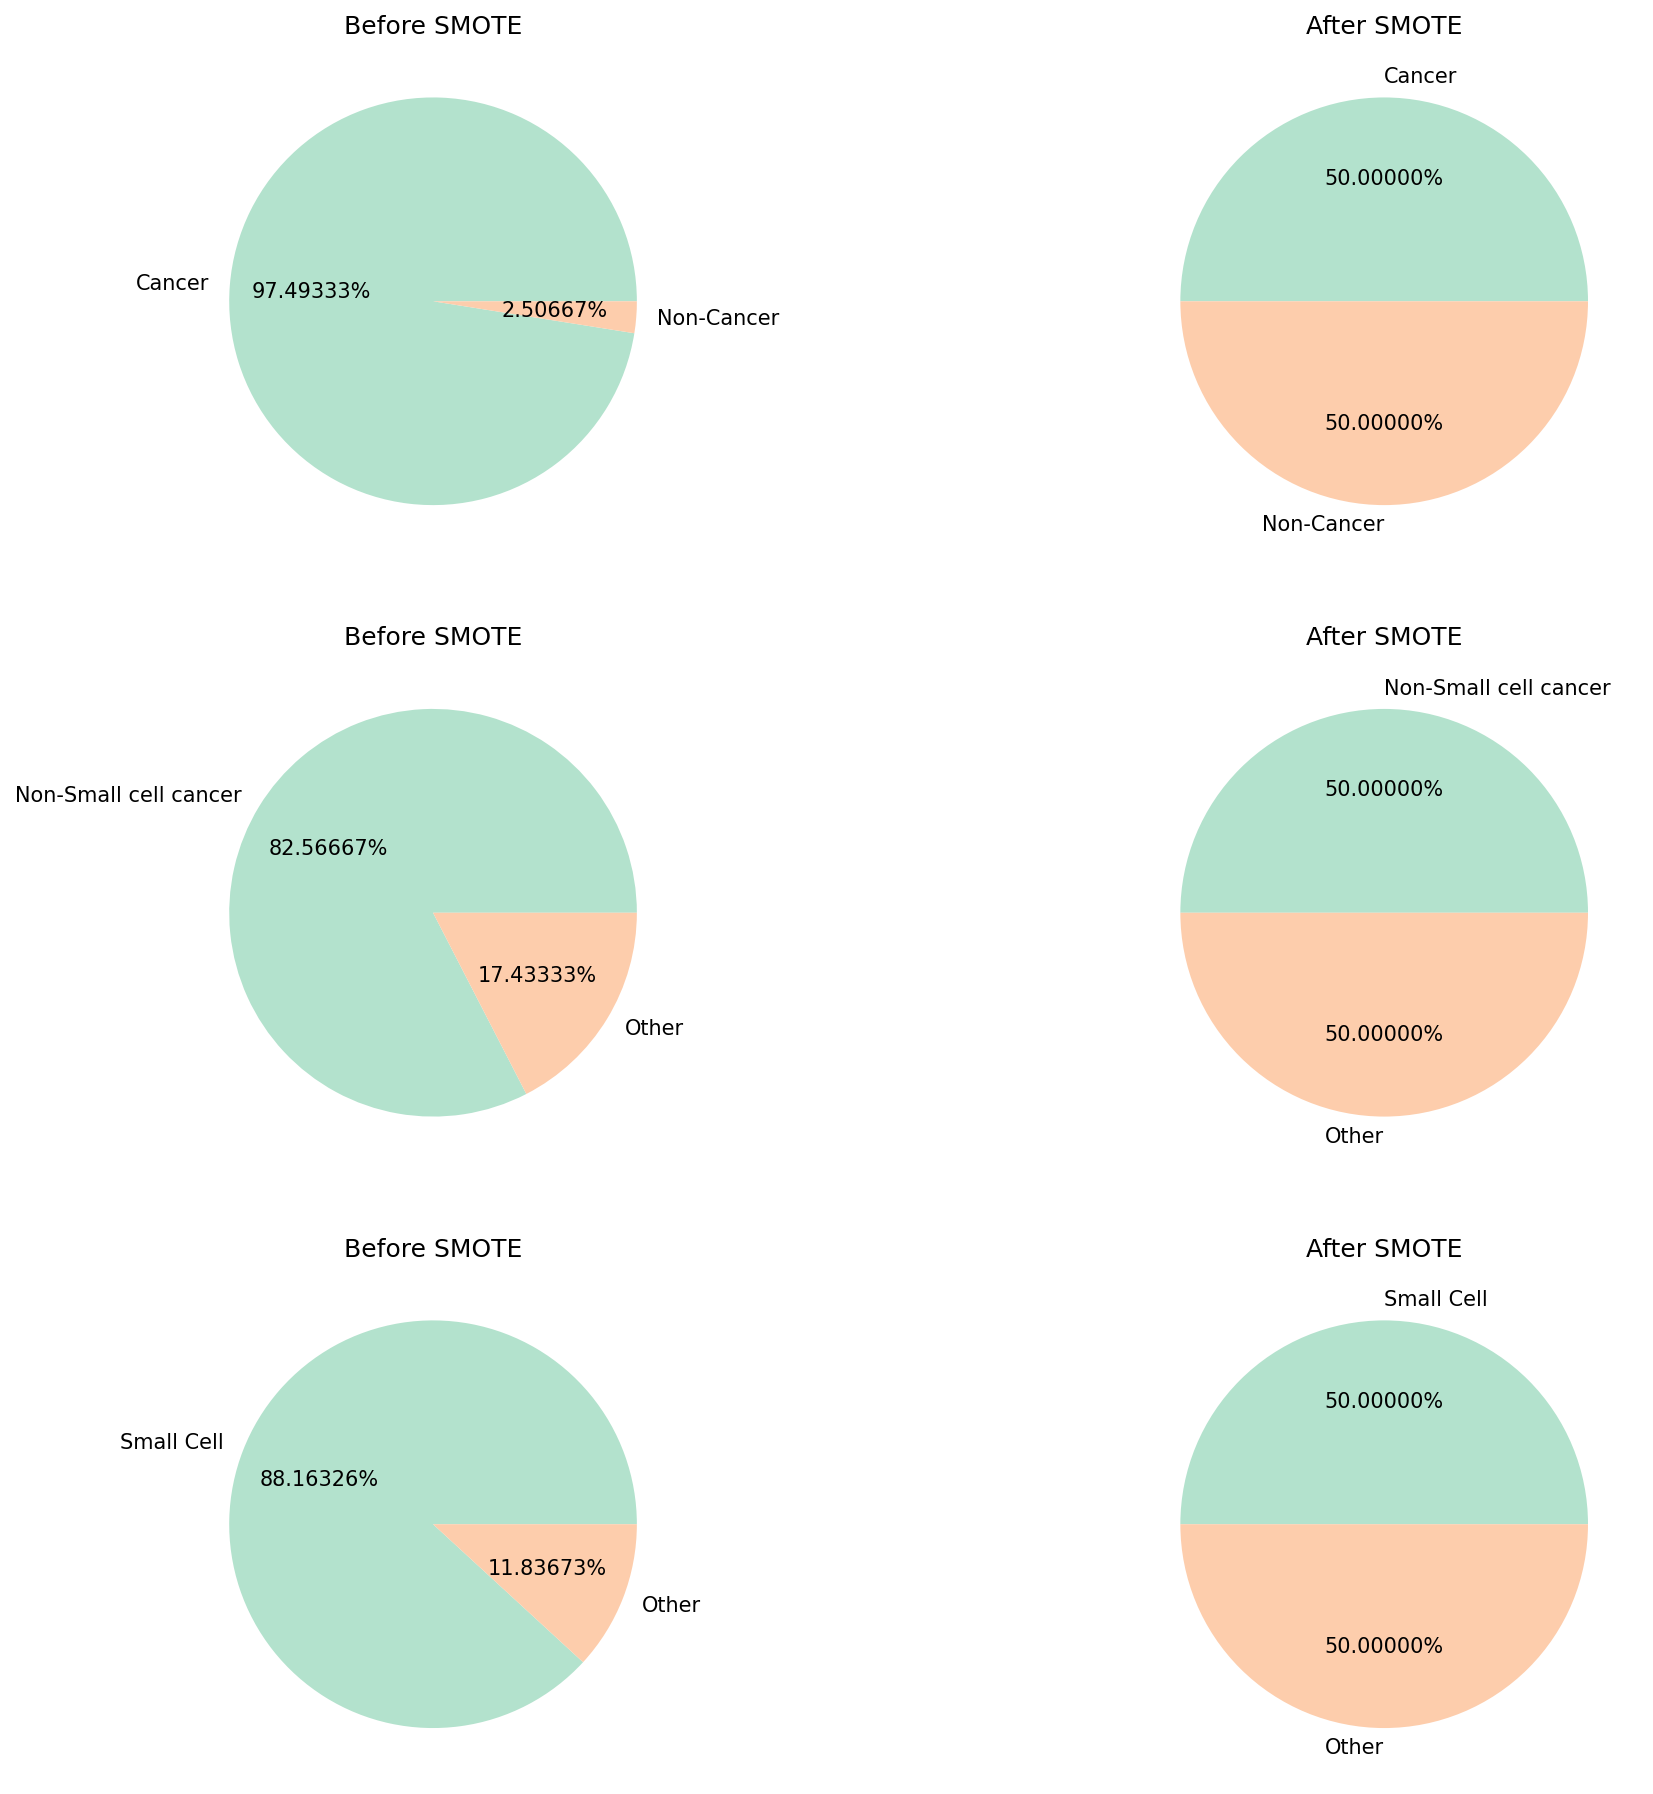

In [ ]:
plt.rcParams['figure.figsize'] = [15,15]
colors = sns.color_palette('Pastel2')
###
plt.subplot(3,2,1)
plt.pie(df1.value_counts(), labels=['Cancer', 'Non-Cancer'], colors=colors, autopct='%.5f%%')
smote = SMOTE(random_state=1)
df_x_over, df_y_over = smote.fit_resample(df_bmi, df1)
plt.title('Before SMOTE')
###
plt.subplot(3,2,2)
plt.pie(df_y_over.value_counts(), labels=['Cancer', 'Non-Cancer'], colors=colors, autopct='%.5f%%')
plt.title('After SMOTE')
###
plt.subplot(3,2,3)
plt.pie(df2.value_counts(), labels=['Non-Small cell cancer', 'Other'], colors=colors, autopct='%.5f%%')
plt.title('Before SMOTE')
###
plt.subplot(3,2,4)
df_x_over, df_y_over = smote.fit_resample(df_bmi, df2)
plt.pie(df_y_over.value_counts(), labels=['Non-Small cell cancer', 'Other'], colors=colors, autopct='%.5f%%')
plt.title('After SMOTE')
###
plt.subplot(3,2,5)
plt.pie(df3.value_counts(), labels=['Small Cell', 'Other'], colors=colors, autopct='%.5f%%')
smote = SMOTE(random_state=1)
df_x_over, df_y_over = smote.fit_resample(df3_bmi, df3)
plt.title('Before SMOTE')
###
plt.subplot(3,2,6)
plt.pie(df_y_over.value_counts(), labels=['Small Cell', 'Other'], colors=colors, autopct='%.5f%%')
plt.title('After SMOTE')

#plt.tight_layout()


In [ ]:
dfff = pd.concat([df_score_1, df_score_2, df_score_3])
index = [['Cancer','Cancer','Cancer','Cancer','Nonsmall','Nonsmall','Nonsmall','Nonsmall','Small','Small','Small','Small'], ['RandomForest', 'GradientBoosting', 'AdaBoost', 'MLP','RandomForest', 'GradientBoosting', 'AdaBoost', 'MLP','RandomForest', 'GradientBoosting', 'AdaBoost', 'MLP']]
dfff.index = index
dfff

Accuracy  Accuracy STD       AUC   AUC STD  \
Cancer   RandomForest      0.952373      0.028529  0.989054  0.021874   
         GradientBoosting  0.796330      0.047149  0.874987  0.043495   
         AdaBoost          0.734274      0.052806  0.810402  0.047737   
         MLP               0.711160      0.061008  0.781596  0.070345   
Nonsmall RandomForest      0.784861      0.190315  0.855603  0.227453   
         GradientBoosting  0.689948      0.193647  0.753370  0.255013   
         AdaBoost          0.673395      0.173925  0.728141  0.238309   
         MLP               0.655026      0.164932  0.701337  0.226800   
Small    RandomForest      0.878194      0.148142  0.948468  0.122786   
         GradientBoosting  0.818016      0.153403  0.897833  0.156273   
         AdaBoost          0.747802      0.154028  0.809881  0.193162   
         MLP               0.666694      0.068567  0.734293  0.105256   

                           F1-Score  F1-Score STD  Precision  Precision STD  \
Cancer   RandomForest      0.951415      0.027695   0.974464       0.050229   
         GradientBoosting  0.786631      0.051266   0.825746       0.052619   
         AdaBoost          0.714337      0.067189   0.770589       0.045804   
         MLP               0.687300      0.079658   0.746987       0.053454   
Nonsmall RandomForest      0.789035      0.127724   0.818913       0.252021   
         GradientBoosting  0.697481      0.105790   0.712863       0.215763   
         AdaBoost          0.674617      0.082411   0.702863       0.203633   
         MLP               0.669336      0.103845   0.664091       0.171564   
Small    RandomForest      0.877061      0.138481   0.903072       0.185318   
         GradientBoosting  0.812832      0.135875   0.856561       0.204326   
         AdaBoost          0.739503      0.126549   0.782020       0.198426   
         MLP               0.676221      0.088626   0.659889       0.077705   

                             Recall  Recall STD  
Cancer   RandomForest      0.929705    0.014188  
         GradientBoosting  0.751850    0.069669  
         AdaBoost          0.666923    0.096347  
         MLP               0.637999    0.112381  
Nonsmall RandomForest      0.772951    0.023046  
         GradientBoosting  0.695034    0.049457  
         AdaBoost          0.662495    0.081346  
         MLP               0.692935    0.186912  
Small    RandomForest      0.855134    0.114339  
         GradientBoosting  0.777877    0.106634  
         AdaBoost          0.705367    0.081895  
         MLP               0.703721    0.192194

# Will they live or die?